<a href="https://colab.research.google.com/github/faridkharis/kmeans-clustering-based-on-app-review/blob/master/3_Clustering_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
path = 'drive/MyDrive/Colab Notebooks/App Improvement Recommendation System/Data/'

In [4]:
df = pd.read_csv(path + 'data-ulasan-oy-preprocessed.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,reviewId,content,score
0,93849d50-aa43-4bea-8cb4-2b68e70bea03,['confidential'],1
1,1520cf87-f7bf-4be6-886a-7c7e6d7d40ac,"['mutu', 'percaya', 'sma', 'komen', 'komena', ...",1
2,861cd396-7a64-484a-81c2-aae3c986e472,"['hubung', 'ib', 'bank']",1
3,bd55e03c-3cf0-4a4c-af68-79bb1883475d,"['perangkat', 'redmi', 'note', 'operasi', 'and...",1
4,68070afc-8dc6-436a-af63-0e3240a376ff,"['besok', 'nyabagaimana']",1
...,...,...,...
2445,9d104fe6-e9fc-4289-bca1-ff70d1996680,"['poin', 'error', 'top-up']",1
2446,2c62146d-a521-45f9-aaac-5e371f93fc92,"['hallo', 'tanggal', 'agustus', 'poin', 'senga...",1
2447,0bfce725-03e6-4abd-aa1f-7cb68d9a3f6a,"['chat', 'dapetnya', 'sombong', 'user', 'takab...",1
2448,45cf797e-27e2-4eac-be22-7c7265caad9c,"['chat', 'sampek', 'sore', 'poin', 'sedih', 'p...",1


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = TfidfVectorizer()
# tfidf_transformer = TfidfTransformer()

vector_data = vectorizer.fit_transform(df['content'])

vector_data.shape

(2450, 2961)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = 0
best_silhoutte_score = -1

# Loop over different values of k
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=0)
    labels = kmeans.fit_predict(vector_data)
    
    # Calculate silhouette score
    score = silhouette_score(vector_data, labels)
    print("For k = {}, silhouette score is {}".format(k, score))

    if score > best_silhoutte_score:
      best_silhoutte_score = score
      best_k = k

print("Best k : ", best_k)
print("Best Silhoutte Score : ", best_silhoutte_score)

For k = 2, silhouette score is 0.02551331844160966
For k = 3, silhouette score is 0.029259170804298056
For k = 4, silhouette score is 0.0320222699465735
For k = 5, silhouette score is 0.0308037385723568
For k = 6, silhouette score is 0.03111632864048554
Best k :  4
Best Silhoutte Score :  0.0320222699465735


In [10]:
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(best_k):
  print("Cluster %d:" % i, end='')
  for ind in order_centroids[i, :2]:
    print(' %s' % terms[ind], end='')
    print()

Top terms per cluster:
Cluster 0: tukar
 pulsa
Cluster 1: poin
 redeem
Cluster 2: pulsa
 redeem
Cluster 3: bank
 transfer


In [11]:
topics = []
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(best_k):
  for j in order_centroids[i, :2]:
    topics.append(terms[j])

print(topics)

['tukar', 'pulsa', 'poin', 'redeem', 'pulsa', 'redeem', 'bank', 'transfer']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


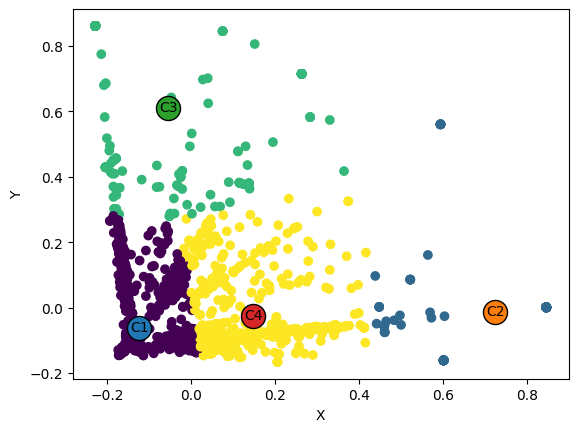

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA to reduce the dimensionality of the data down to two dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vector_data.toarray())

# Apply KMeans clustering to the reduced data
kmeans = KMeans(n_clusters=best_k)
cluster_labels = kmeans.fit_predict(reduced_data)
centroids = kmeans.cluster_centers_

# Create a scatter plot of the reduced data, with points colored by cluster label
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels)

# Add centroid labels to the plot
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='o', s=300, edgecolors='black', linewidths=1)
    plt.annotate('C{}'.format(i+1), xy=(centroid[0], centroid[1]), xytext=(centroid[0]-0.02, centroid[1]-0.02),
                 color='black', fontsize=10, fontweight='normal', ha='left', va='bottom')

# Set x and y axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()

In [10]:
# import json
# a = reduced_data.tolist()
# b = [{'x': x[0], 'y': x[1]} for i, x in enumerate(a)]
# print(b)

In [13]:
df['cluster'] = cluster_labels
df['topic'] = cluster_labels

for i in range(best_k):
  df['topic'] = df['topic'].replace([i], topics[i*2]+' '+topics[i*2+1])

In [14]:
df

,reviewId,content,score,cluster,topic
0,93849d50-aa43-4bea-8cb4-2b68e70bea03,['confidential'],1,0,tukar pulsa
1,1520cf87-f7bf-4be6-886a-7c7e6d7d40ac,"['mutu', 'percaya', 'sma', 'komen', 'komena', ...",1,0,tukar pulsa
2,861cd396-7a64-484a-81c2-aae3c986e472,"['hubung', 'ib', 'bank']",1,0,tukar pulsa
3,bd55e03c-3cf0-4a4c-af68-79bb1883475d,"['perangkat', 'redmi', 'note', 'operasi', 'and...",1,0,tukar pulsa
4,68070afc-8dc6-436a-af63-0e3240a376ff,"['besok', 'nyabagaimana']",1,0,tukar pulsa
...,...,...,...,...,...
2445,9d104fe6-e9fc-4289-bca1-ff70d1996680,"['poin', 'error', 'top-up']",1,0,tukar pulsa
2446,2c62146d-a521-45f9-aaac-5e371f93fc92,"['hallo', 'tanggal', 'agustus', 'poin', 'senga...",1,0,tukar pulsa
2447,0bfce725-03e6-4abd-aa1f-7cb68d9a3f6a,"['chat', 'dapetnya', 'sombong', 'user', 'takab...",1,0,tukar pulsa
2448,45cf797e-27e2-4eac-be22-7c7265caad9c,"['chat', 'sampek', 'sore', 'poin', 'sedih', 'p...",1,0,tukar pulsa


In [15]:
with open(path + 'data-ulasan-oy-topic.csv', 'w') as f:
  df.to_csv(f)